In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("whitegrid")


# Time series/date  functionality in Pandas

Pandas was initially developed for the purpose of analyzing financial time series data. Therefore, It contains a variety of functionalities to deal with date and time related data.

## Timestamp
+ Date and time are together encapsulated in ```Timestamp``` objects.
+ ```Timestamps``` are integer numbers, representing the nanoseconds ($10^{-9}$ seconds) elapsed since the Unix epoch 1970-01-01 when the first Unix machine officially started to tick.


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

### ```pd.to_datetime()```

It allows us to convert any human-readable format for date and time strings to timestamps.

In [36]:
pd.to_datetime(1637591610, unit='s')

Timestamp('2021-11-22 14:33:30')

In [5]:
pd.to_datetime('28th Feb 2022 10:18')

Timestamp('2022-02-28 10:18:00')

In [7]:
pd.to_datetime('09.06.2022')

Timestamp('2022-09-06 00:00:00')

In [8]:
pd.to_datetime('09.06.2022',dayfirst=True)

Timestamp('2022-06-09 00:00:00')

In [10]:
pd.to_datetime('28022022',format='%d%m%Y')

Timestamp('2022-02-28 00:00:00')

**`pd.to_datetime()` can take dictionary with datetime features**

In [3]:
my_dict = {'year': [2015, 2016],
                'month': [2, 3],
                'day': [4, 5],
                'minute' : [10, 20]
               }
my_dict

{'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5], 'minute': [10, 20]}

In [4]:
pd.to_datetime(my_dict) # --> it returns a pandas.Series

0   2015-02-04 00:10:00
1   2016-03-05 00:20:00
dtype: datetime64[ns]

#### Feature Engineering of dates


- ts.dt.year
- ts.dt.month: January == 1 ... December == 12
- ts.dt.month_name()
- ts.dt.day
- ts.dt.weekday: Monday == 0 … Sunday == 6
- ts.dt.day_name()
- ts.dt.minute
- ts.dt.quarter: January-->March Q1 == 1, April-->June Q2 == 2, July-->September Q3 == 3, October-->December Q4 == 4

**Let's create a toy dataframe with dates**

Q: How do we create a two-columns pandas dataframe having 'description' and 'date' as column names and description and date listes as corrisponding values?

In [11]:
date_time_encounter = '28th Feb 2022'

In [12]:
zorro_birthday = '24th August 2020'

In [13]:
iwd = '08.03.2022'

In [15]:
description =['DateTime Encounter',"Zorro's Birthday",'IWD']

In [17]:
date = [date_time_encounter,zorro_birthday,iwd] # creating List of Dates

In [18]:
df = pd.DataFrame(data={'description':description, 'date':date}) # putting the List in the DataFrame
df

,description,date
0,DateTime Encounter,28th Feb 2022
1,Zorro's Birthday,24th August 2020
2,IWD,08.03.2022


In [22]:
# We can pass a complete column to convert all entries to date time objects [<- usual case]
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [35]:
df

,description,date,month,month_name,day,quarter
0,DateTime Encounter,2022-02-28,2,February,28,1
1,Zorro's Birthday,2020-08-24,8,August,24,3
2,IWD,2022-03-08,3,March,8,1


**Time-Related Features of df**

In [28]:
# Let's create new date feature
df['month'] = df['date'].dt.month

In [30]:
df['month_name'] = df['date'].dt.month_name()

In [32]:
df['day'] = df['date'].dt.day

In [34]:
df['quarter'] = df['date'].dt.quarter

---

##  DateTimeIndex

```pd.date_range()```

It allows us to generate a range of dates as **DateTimeIndex**, that is an array of **Timestamps**


In [39]:
start_date = '02.01.2022'
end_date = '28th Feb 2022'

In [40]:
# Specify start and end

pd.date_range(start = start_date, end = end_date)

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', freq='D')

In [41]:
# Specify start and period (period = total number of days)

pd.date_range(start = start_date, periods= 72)

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
      

In [42]:
# Specify 'end' and 'period' 

pd.date_range(end=end_date,periods=12) 

DatetimeIndex(['2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# Change the frequency

pd.date_range(start=start_date, periods=10, freq='w')

DatetimeIndex(['2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27',
               '2022-03-06', '2022-03-13', '2022-03-20', '2022-03-27',
               '2022-04-03', '2022-04-10'],
              dtype='datetime64[ns]', freq='W-SUN')

In [46]:
date_range = pd.date_range(start=start_date, end=end_date,freq='B') #Business day
date_range

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', freq='B')

**If you have a DateTimeIndex object you can extract as well time related feature**

In [47]:
date_range.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Monday'],
      dtype='object')

**Let's read some data in a dataframe**

The file contains 8 years stock prices

In [48]:
!head stock_px.csv

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93
2003-01-09 00:00:00,7.34,21.93,29.44,927.57
2003-01-10 00:00:00,7.36,21.97,29.03,927.57
2003-01-13 00:00:00,7.32,22.16,28.91,926.26
2003-01-14 00:00:00,7.3,22.39,29.17,931.66


### In time series, the time usually goes as index, special DateTimeIndex
But for your project you don't need a DateTime index, because dates is one of your features.

In [49]:
# read in data
df = pd.read_csv('stock_px.csv',parse_dates=True,index_col=0)

# parse_dates=True will try to interpret the index_col as a pd.DatetimeIndex
df

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [51]:
df.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

In [52]:
df.index.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', length=2214)

In [ ]:
df

Text(0, 0.5, 'Prices')

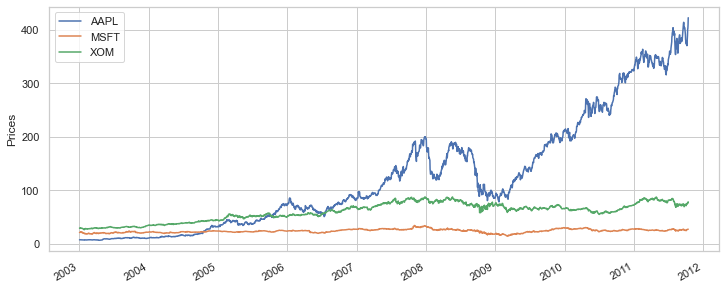

In [53]:
# Plots - you don't have to specify x because it's always the index

df[['AAPL','MSFT','XOM']].plot(figsize=(12, 5)) #plot from pandas
plt.ylabel('Prices')

### Resample
```df.resample()```

It works a bit like the the .groupby() function.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

it changes rows to a different time interval. Only works when the index is a datetime object

#### down (fewer rows)
e.g. :
+ df.resample('2D').max()
+ df.resample('3D').mean()


#### up (more rows)
e.g.:
+ df.resample('8h').ffill()
+ df.resample('8h').interpolate(method='linear')

#### down

In [54]:
apple_df = df[['AAPL']]
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
dtypes: float64(1)
memory usage: 34.6 KB


In [55]:
apple_df.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

In [56]:
apple_df

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
...,...
2011-10-10,388.81
2011-10-11,400.29
2011-10-12,402.19
2011-10-13,408.43


In [57]:
for i in apple_df.resample('5D'):
    print(i)

(Timestamp('2003-01-02 00:00:00', freq='5D'),             AAPL
2003-01-02  7.40
2003-01-03  7.45
2003-01-06  7.45)
(Timestamp('2003-01-07 00:00:00', freq='5D'),             AAPL
2003-01-07  7.43
2003-01-08  7.28
2003-01-09  7.34
2003-01-10  7.36)
(Timestamp('2003-01-12 00:00:00', freq='5D'),             AAPL
2003-01-13  7.32
2003-01-14  7.30
2003-01-15  7.22
2003-01-16  7.31)
(Timestamp('2003-01-17 00:00:00', freq='5D'),             AAPL
2003-01-17  7.05
2003-01-21  7.01)
(Timestamp('2003-01-22 00:00:00', freq='5D'),             AAPL
2003-01-22  6.94
2003-01-23  7.09
2003-01-24  6.90)
(Timestamp('2003-01-27 00:00:00', freq='5D'),             AAPL
2003-01-27  7.07
2003-01-28  7.29
2003-01-29  7.47
2003-01-30  7.16
2003-01-31  7.18)
(Timestamp('2003-02-01 00:00:00', freq='5D'),             AAPL
2003-02-03  7.33
2003-02-04  7.30
2003-02-05  7.22)
(Timestamp('2003-02-06 00:00:00', freq='5D'),             AAPL
2003-02-06  7.22
2003-02-07  7.07
2003-02-10  7.18)
(Timestamp('2003-02-11 00:00:

2005-02-24  44.47)
(Timestamp('2005-02-25 00:00:00', freq='5D'),              AAPL
2005-02-25  44.49
2005-02-28  44.86
2005-03-01  44.50)
(Timestamp('2005-03-02 00:00:00', freq='5D'),              AAPL
2005-03-02  44.12
2005-03-03  41.79
2005-03-04  42.81)
(Timestamp('2005-03-07 00:00:00', freq='5D'),              AAPL
2005-03-07  42.75
2005-03-08  40.53
2005-03-09  39.35
2005-03-10  39.83
2005-03-11  40.27)
(Timestamp('2005-03-12 00:00:00', freq='5D'),              AAPL
2005-03-14  40.32
2005-03-15  40.96
2005-03-16  41.18)
(Timestamp('2005-03-17 00:00:00', freq='5D'),              AAPL
2005-03-17  42.25
2005-03-18  42.96
2005-03-21  43.70)
(Timestamp('2005-03-22 00:00:00', freq='5D'),              AAPL
2005-03-22  42.83
2005-03-23  42.55
2005-03-24  42.50)
(Timestamp('2005-03-27 00:00:00', freq='5D'),              AAPL
2005-03-28  42.53
2005-03-29  41.75
2005-03-30  42.80
2005-03-31  41.67)
(Timestamp('2005-04-01 00:00:00', freq='5D'),              AAPL
2005-04-01  40.89
2005-04-04  

2007-02-14  85.30)
(Timestamp('2007-02-15 00:00:00', freq='5D'),              AAPL
2007-02-15  85.21
2007-02-16  84.83)
(Timestamp('2007-02-20 00:00:00', freq='5D'),              AAPL
2007-02-20  85.90
2007-02-21  89.20
2007-02-22  89.51
2007-02-23  89.07)
(Timestamp('2007-02-25 00:00:00', freq='5D'),              AAPL
2007-02-26  88.51
2007-02-27  83.93
2007-02-28  84.61
2007-03-01  87.06)
(Timestamp('2007-03-02 00:00:00', freq='5D'),              AAPL
2007-03-02  85.41
2007-03-05  86.32
2007-03-06  88.19)
(Timestamp('2007-03-07 00:00:00', freq='5D'),              AAPL
2007-03-07  87.72
2007-03-08  88.00
2007-03-09  87.97)
(Timestamp('2007-03-12 00:00:00', freq='5D'),              AAPL
2007-03-12  89.87
2007-03-13  88.40
2007-03-14  90.00
2007-03-15  89.57
2007-03-16  89.59)
(Timestamp('2007-03-17 00:00:00', freq='5D'),              AAPL
2007-03-19  91.13
2007-03-20  91.48
2007-03-21  93.87)
(Timestamp('2007-03-22 00:00:00', freq='5D'),              AAPL
2007-03-22  93.96
2007-03-23  

2009-10-16  188.05)
(Timestamp('2009-10-17 00:00:00', freq='5D'),               AAPL
2009-10-19  189.86
2009-10-20  198.76
2009-10-21  204.92)
(Timestamp('2009-10-22 00:00:00', freq='5D'),               AAPL
2009-10-22  205.20
2009-10-23  203.94
2009-10-26  202.48)
(Timestamp('2009-10-27 00:00:00', freq='5D'),               AAPL
2009-10-27  197.37
2009-10-28  192.40
2009-10-29  196.35
2009-10-30  188.50)
(Timestamp('2009-11-01 00:00:00', freq='5D'),               AAPL
2009-11-02  189.31
2009-11-03  188.75
2009-11-04  190.81
2009-11-05  194.03)
(Timestamp('2009-11-06 00:00:00', freq='5D'),               AAPL
2009-11-06  194.34
2009-11-09  201.46
2009-11-10  202.98)
(Timestamp('2009-11-11 00:00:00', freq='5D'),               AAPL
2009-11-11  203.25
2009-11-12  201.99
2009-11-13  204.45)
(Timestamp('2009-11-16 00:00:00', freq='5D'),               AAPL
2009-11-16  206.63
2009-11-17  207.00
2009-11-18  205.96
2009-11-19  200.51
2009-11-20  199.92)
(Timestamp('2009-11-21 00:00:00', freq='5D'

In [58]:
 apple_df.resample('5D').mean()

,AAPL
2003-01-02,7.433333
2003-01-07,7.352500
2003-01-12,7.287500
2003-01-17,7.030000
2003-01-22,6.976667
...,...
2011-09-22,403.096667
2011-09-27,392.040000
2011-10-02,375.680000
2011-10-07,386.300000


### up

In [59]:
 apple_df.head(10)

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
2003-01-09,7.34
2003-01-10,7.36
2003-01-13,7.32
2003-01-14,7.30
2003-01-15,7.22


In [61]:
for i in apple_df.resample('8h'):
    print(i)

(Timestamp('2003-01-02 00:00:00', freq='8H'),             AAPL
2003-01-02   7.4)
(Timestamp('2003-01-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-03 00:00:00', freq='8H'),             AAPL
2003-01-03  7.45)
(Timestamp('2003-01-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-04 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-05 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-05 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-01-05 16:00:00', fre

Index: [])
(Timestamp('2003-03-22 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-23 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-23 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-24 00:00:00', freq='8H'),             AAPL
2003-03-24  7.18)
(Timestamp('2003-03-24 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-24 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-25 00:00:00', freq='8H'),             AAPL
2003-03-25  7.28)
(Timestamp('2003-03-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-25 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-03-26 00:00:00', freq='8H'),             AAPL
2003-03-26   7.2)
(Timestamp('2003-03-26 08:00:00', 

2003-06-17   9.1)
(Timestamp('2003-06-17 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-17 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-18 00:00:00', freq='8H'),             AAPL
2003-06-18  9.56)
(Timestamp('2003-06-18 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-18 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-19 00:00:00', freq='8H'),             AAPL
2003-06-19  9.57)
(Timestamp('2003-06-19 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-19 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-20 00:00:00', freq='8H'),             AAPL
2003-06-20   9.6)
(Timestamp('2003-06-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-06-21 00:0

Index: [])
(Timestamp('2003-09-20 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-21 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-21 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-21 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-22 00:00:00', freq='8H'),              AAPL
2003-09-22  11.04)
(Timestamp('2003-09-22 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-22 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-23 00:00:00', freq='8H'),              AAPL
2003-09-23  11.22)
(Timestamp('2003-09-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-09-23

Index: [])
(Timestamp('2003-12-30 00:00:00', freq='8H'),              AAPL
2003-12-30  10.64)
(Timestamp('2003-12-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-12-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-12-31 00:00:00', freq='8H'),              AAPL
2003-12-31  10.69)
(Timestamp('2003-12-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2003-12-31 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-01-01 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-01-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-01-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-01-02 00:00:00', freq='8H'),              AAPL
2004-01-02  10.64)
(Timestamp('2004-01-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-01-02 16:00

2004-04-01  13.56)
(Timestamp('2004-04-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-02 00:00:00', freq='8H'),              AAPL
2004-04-02  13.75)
(Timestamp('2004-04-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-03 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-04 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-04-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timesta

2004-07-06  15.48)
(Timestamp('2004-07-06 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-06 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-07 00:00:00', freq='8H'),              AAPL
2004-07-07  15.19)
(Timestamp('2004-07-07 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-07 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-08 00:00:00', freq='8H'),              AAPL
2004-07-08  15.07)
(Timestamp('2004-07-08 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-08 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-09 00:00:00', freq='8H'),              AAPL
2004-07-09  15.02)
(Timestamp('2004-07-09 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-09 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-07-

Index: [])
(Timestamp('2004-10-04 00:00:00', freq='8H'),             AAPL
2004-10-04  19.4)
(Timestamp('2004-10-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-05 00:00:00', freq='8H'),              AAPL
2004-10-05  19.68)
(Timestamp('2004-10-05 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-05 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-06 00:00:00', freq='8H'),              AAPL
2004-10-06  20.32)
(Timestamp('2004-10-06 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-06 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-07 00:00:00', freq='8H'),              AAPL
2004-10-07  19.81)
(Timestamp('2004-10-07 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-10-07 16:00:00', fr

Index: [])
(Timestamp('2004-12-22 00:00:00', freq='8H'),              AAPL
2004-12-22  31.88)
(Timestamp('2004-12-22 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-22 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-23 00:00:00', freq='8H'),              AAPL
2004-12-23  32.01)
(Timestamp('2004-12-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-23 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-24 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-24 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-24 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-25 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2004-12-25

Index: [])
(Timestamp('2005-03-10 00:00:00', freq='8H'),              AAPL
2005-03-10  39.83)
(Timestamp('2005-03-10 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-10 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-11 00:00:00', freq='8H'),              AAPL
2005-03-11  40.27)
(Timestamp('2005-03-11 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-11 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-12 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-12 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-12 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-13 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-13 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-03-13

Index: [])
(Timestamp('2005-05-30 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-05-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-05-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-05-31 00:00:00', freq='8H'),              AAPL
2005-05-31  39.76)
(Timestamp('2005-05-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-05-31 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-06-01 00:00:00', freq='8H'),             AAPL
2005-06-01  40.3)
(Timestamp('2005-06-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-06-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-06-02 00:00:00', freq='8H'),              AAPL
2005-06-02  40.04)
(Timestamp('2005-06-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-06-02 16:00:0

(Timestamp('2005-09-01 00:00:00', freq='8H'),              AAPL
2005-09-01  46.26)
(Timestamp('2005-09-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-02 00:00:00', freq='8H'),              AAPL
2005-09-02  46.22)
(Timestamp('2005-09-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-03 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-04 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-09-04 16:00:00',

Index: [])
(Timestamp('2005-12-07 00:00:00', freq='8H'),              AAPL
2005-12-07  73.95)
(Timestamp('2005-12-07 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-07 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-08 00:00:00', freq='8H'),              AAPL
2005-12-08  74.08)
(Timestamp('2005-12-08 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-08 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-09 00:00:00', freq='8H'),              AAPL
2005-12-09  74.33)
(Timestamp('2005-12-09 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-09 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-10 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-10 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2005-12-10 16:00

Index: [])
(Timestamp('2006-03-07 00:00:00', freq='8H'),              AAPL
2006-03-07  66.31)
(Timestamp('2006-03-07 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-07 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-08 00:00:00', freq='8H'),              AAPL
2006-03-08  65.66)
(Timestamp('2006-03-08 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-08 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-09 00:00:00', freq='8H'),              AAPL
2006-03-09  63.93)
(Timestamp('2006-03-09 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-09 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-10 00:00:00', freq='8H'),              AAPL
2006-03-10  63.19)
(Timestamp('2006-03-10 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-03-10 16:00:00', 

Index: [])
(Timestamp('2006-05-28 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-28 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-28 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-29 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-29 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-29 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-30 00:00:00', freq='8H'),              AAPL
2006-05-30  61.22)
(Timestamp('2006-05-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-31 00:00:00', freq='8H'),              AAPL
2006-05-31  59.77)
(Timestamp('2006-05-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-05-31

Index: [])
(Timestamp('2006-08-28 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-29 00:00:00', freq='8H'),              AAPL
2006-08-29  66.48)
(Timestamp('2006-08-29 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-29 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-30 00:00:00', freq='8H'),              AAPL
2006-08-30  66.96)
(Timestamp('2006-08-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-31 00:00:00', freq='8H'),              AAPL
2006-08-31  67.85)
(Timestamp('2006-08-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-08-31 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-09-01 00:00:00', freq='8H'),              AAPL
2006-09-01  68.38)
(Timestamp('2006-09-01 08:00:00', 

Index: [])
(Timestamp('2006-11-15 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-16 00:00:00', freq='8H'),              AAPL
2006-11-16  85.61)
(Timestamp('2006-11-16 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-16 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-17 00:00:00', freq='8H'),              AAPL
2006-11-17  85.85)
(Timestamp('2006-11-17 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-17 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-18 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-18 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-18 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-19 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2006-11-19

Index: [])
(Timestamp('2007-02-07 00:00:00', freq='8H'),              AAPL
2007-02-07  86.15)
(Timestamp('2007-02-07 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-07 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-08 00:00:00', freq='8H'),              AAPL
2007-02-08  86.18)
(Timestamp('2007-02-08 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-08 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-09 00:00:00', freq='8H'),              AAPL
2007-02-09  83.27)
(Timestamp('2007-02-09 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-09 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-10 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-10 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-02-10 16:00

(Timestamp('2007-05-17 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-18 00:00:00', freq='8H'),               AAPL
2007-05-18  110.02)
(Timestamp('2007-05-18 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-18 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-19 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-19 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-19 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-20 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-05-21 00:00:00', freq='8H'),               AAPL
2007-05-21  111.98)
(Timestamp('2007-05-21 08:00:

2007-08-02  136.49)
(Timestamp('2007-08-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-03 00:00:00', freq='8H'),               AAPL
2007-08-03  131.85)
(Timestamp('2007-08-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-04 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-05 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-05 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-08-05 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Time

Index: [])
(Timestamp('2007-10-23 00:00:00', freq='8H'),               AAPL
2007-10-23  186.16)
(Timestamp('2007-10-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-23 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-24 00:00:00', freq='8H'),               AAPL
2007-10-24  185.93)
(Timestamp('2007-10-24 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-24 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-25 00:00:00', freq='8H'),               AAPL
2007-10-25  182.78)
(Timestamp('2007-10-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-25 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-26 00:00:00', freq='8H'),              AAPL
2007-10-26  184.7)
(Timestamp('2007-10-26 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2007-10-26 16:00

Index: [])
(Timestamp('2008-01-12 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-12 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-12 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-13 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-13 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-13 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-14 00:00:00', freq='8H'),               AAPL
2008-01-14  178.78)
(Timestamp('2008-01-14 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-14 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-01-15 00:00:00', freq='8H'),               AAPL
2008-01-15  169.04)
(Timestamp('2008-01-15 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-0

(Timestamp('2008-04-25 00:00:00', freq='8H'),               AAPL
2008-04-25  169.73)
(Timestamp('2008-04-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-25 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-26 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-26 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-26 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-27 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-27 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-27 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-28 00:00:00', freq='8H'),               AAPL
2008-04-28  172.24)
(Timestamp('2008-04-28 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-04-28 16:00:

Index: [])
(Timestamp('2008-08-01 00:00:00', freq='8H'),               AAPL
2008-08-01  156.66)
(Timestamp('2008-08-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-02 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-03 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-08-04 00:00:00', freq='8H'),               AAPL
2008-08-04  153.23)
(Timestamp('2008-08-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-0

(Timestamp('2008-10-30 00:00:00', freq='8H'),               AAPL
2008-10-30  111.04)
(Timestamp('2008-10-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-10-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-10-31 00:00:00', freq='8H'),               AAPL
2008-10-31  107.59)
(Timestamp('2008-10-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-10-31 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-01 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-02 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2008-11-02 16:00:

2009-02-03  92.98)
(Timestamp('2009-02-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-04 00:00:00', freq='8H'),              AAPL
2009-02-04  93.55)
(Timestamp('2009-02-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-05 00:00:00', freq='8H'),              AAPL
2009-02-05  96.46)
(Timestamp('2009-02-05 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-05 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-06 00:00:00', freq='8H'),              AAPL
2009-02-06  99.72)
(Timestamp('2009-02-06 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-06 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-02-

Index: [])
(Timestamp('2009-05-01 00:00:00', freq='8H'),               AAPL
2009-05-01  127.24)
(Timestamp('2009-05-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-02 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-03 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-05-04 00:00:00', freq='8H'),               AAPL
2009-05-04  132.07)
(Timestamp('2009-05-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-0

Index: [])
(Timestamp('2009-07-19 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-19 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-19 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-20 00:00:00', freq='8H'),               AAPL
2009-07-20  152.91)
(Timestamp('2009-07-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-21 00:00:00', freq='8H'),               AAPL
2009-07-21  151.51)
(Timestamp('2009-07-21 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-21 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-22 00:00:00', freq='8H'),               AAPL
2009-07-22  156.74)
(Timestamp('2009-07-22 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-07-22

(Timestamp('2009-10-22 00:00:00', freq='8H'),              AAPL
2009-10-22  205.2)
(Timestamp('2009-10-22 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-22 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-23 00:00:00', freq='8H'),               AAPL
2009-10-23  203.94)
(Timestamp('2009-10-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-23 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-24 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-24 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-24 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-25 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2009-10-25 16:00:00

Index: [])
(Timestamp('2010-01-24 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-24 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-24 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-25 00:00:00', freq='8H'),               AAPL
2010-01-25  203.07)
(Timestamp('2010-01-25 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-25 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-26 00:00:00', freq='8H'),               AAPL
2010-01-26  205.94)
(Timestamp('2010-01-26 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-26 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-27 00:00:00', freq='8H'),               AAPL
2010-01-27  207.88)
(Timestamp('2010-01-27 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-01-27

Index: [])
(Timestamp('2010-04-30 00:00:00', freq='8H'),               AAPL
2010-04-30  261.09)
(Timestamp('2010-04-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-04-30 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-01 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-02 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-05-03 00:00:00', freq='8H'),               AAPL
2010-05-03  266.35)
(Timestamp('2010-05-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-0

Index: [])
(Timestamp('2010-07-27 00:00:00', freq='8H'),               AAPL
2010-07-27  264.08)
(Timestamp('2010-07-27 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-27 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-28 00:00:00', freq='8H'),               AAPL
2010-07-28  260.96)
(Timestamp('2010-07-28 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-28 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-29 00:00:00', freq='8H'),               AAPL
2010-07-29  258.11)
(Timestamp('2010-07-29 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-29 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-30 00:00:00', freq='8H'),               AAPL
2010-07-30  257.25)
(Timestamp('2010-07-30 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-07-30 16:

2010-11-02  309.36)
(Timestamp('2010-11-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-03 00:00:00', freq='8H'),              AAPL
2010-11-03  312.8)
(Timestamp('2010-11-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-04 00:00:00', freq='8H'),               AAPL
2010-11-04  318.27)
(Timestamp('2010-11-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-05 00:00:00', freq='8H'),               AAPL
2010-11-05  317.13)
(Timestamp('2010-11-05 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2010-11-05 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('201

2011-01-31  339.32)
(Timestamp('2011-01-31 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-01-31 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-01 00:00:00', freq='8H'),               AAPL
2011-02-01  345.03)
(Timestamp('2011-02-01 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-02 00:00:00', freq='8H'),               AAPL
2011-02-02  344.32)
(Timestamp('2011-02-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-03 00:00:00', freq='8H'),               AAPL
2011-02-03  343.44)
(Timestamp('2011-02-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-02-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2

Index: [])
(Timestamp('2011-04-20 00:00:00', freq='8H'),               AAPL
2011-04-20  342.41)
(Timestamp('2011-04-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-21 00:00:00', freq='8H'),              AAPL
2011-04-21  350.7)
(Timestamp('2011-04-21 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-21 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-22 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-22 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-22 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-23 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-23 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-04-

2011-07-18  373.8)
(Timestamp('2011-07-18 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-18 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-19 00:00:00', freq='8H'),               AAPL
2011-07-19  376.85)
(Timestamp('2011-07-19 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-19 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-20 00:00:00', freq='8H'),              AAPL
2011-07-20  386.9)
(Timestamp('2011-07-20 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-20 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-21 00:00:00', freq='8H'),               AAPL
2011-07-21  387.29)
(Timestamp('2011-07-21 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-07-21 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011

Index: [])
(Timestamp('2011-10-01 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-02 00:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-02 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-02 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-03 00:00:00', freq='8H'),              AAPL
2011-10-03  374.6)
(Timestamp('2011-10-03 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-03 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-04 00:00:00', freq='8H'),              AAPL
2011-10-04  372.5)
(Timestamp('2011-10-04 08:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-04 16:00:00', freq='8H'), Empty DataFrame
Columns: [AAPL]
Index: [])
(Timestamp('2011-10-05 00:00:00', freq='8H'),               AAPL
2011-10-05  378.25)
(Timestamp('2011-10-05 08:

In [65]:
apple_df.resample('8h').interpolate(method='linear')

,AAPL
2003-01-02 00:00:00,7.400000
2003-01-02 08:00:00,7.416667
2003-01-02 16:00:00,7.433333
2003-01-03 00:00:00,7.450000
2003-01-03 08:00:00,7.450000
...,...
2011-10-12 16:00:00,406.350000
2011-10-13 00:00:00,408.430000
2011-10-13 08:00:00,412.953333
2011-10-13 16:00:00,417.476667


### Rolling averages

Example where the rolling avarage is used :https://interaktiv.tagesspiegel.de/lab/karte-sars-cov-2-in-deutschland-landkreise/

We can use it to remove for example the day-to-day noise from the observations.
- df.rolling('3D').mean() 

In [67]:
 apple_df.head(10)

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
2003-01-09,7.34
2003-01-10,7.36
2003-01-13,7.32
2003-01-14,7.30
2003-01-15,7.22


In [66]:
for i in apple_df.rolling(window='3D'): # window of three consecutive day
    print(i)

            AAPL
2003-01-02   7.4
            AAPL
2003-01-02  7.40
2003-01-03  7.45
            AAPL
2003-01-06  7.45
            AAPL
2003-01-06  7.45
2003-01-07  7.43
            AAPL
2003-01-06  7.45
2003-01-07  7.43
2003-01-08  7.28
            AAPL
2003-01-07  7.43
2003-01-08  7.28
2003-01-09  7.34
            AAPL
2003-01-08  7.28
2003-01-09  7.34
2003-01-10  7.36
            AAPL
2003-01-13  7.32
            AAPL
2003-01-13  7.32
2003-01-14  7.30
            AAPL
2003-01-13  7.32
2003-01-14  7.30
2003-01-15  7.22
            AAPL
2003-01-14  7.30
2003-01-15  7.22
2003-01-16  7.31
            AAPL
2003-01-15  7.22
2003-01-16  7.31
2003-01-17  7.05
            AAPL
2003-01-21  7.01
            AAPL
2003-01-21  7.01
2003-01-22  6.94
            AAPL
2003-01-21  7.01
2003-01-22  6.94
2003-01-23  7.09
            AAPL
2003-01-22  6.94
2003-01-23  7.09
2003-01-24  6.90
            AAPL
2003-01-27  7.07
            AAPL
2003-01-27  7.07
2003-01-28  7.29
            AAPL
2003-01-27  7.

2003-08-12  9.85
             AAPL
2003-08-11   9.83
2003-08-12   9.85
2003-08-13  10.09
             AAPL
2003-08-12   9.85
2003-08-13  10.09
2003-08-14   9.98
             AAPL
2003-08-13  10.09
2003-08-14   9.98
2003-08-15   9.85
             AAPL
2003-08-18  10.17
             AAPL
2003-08-18  10.17
2003-08-19  10.16
             AAPL
2003-08-18  10.17
2003-08-19  10.16
2003-08-20  10.51
             AAPL
2003-08-19  10.16
2003-08-20  10.51
2003-08-21  10.84
             AAPL
2003-08-20  10.51
2003-08-21  10.84
2003-08-22  10.44
             AAPL
2003-08-25  10.43
             AAPL
2003-08-25  10.43
2003-08-26  10.52
             AAPL
2003-08-25  10.43
2003-08-26  10.52
2003-08-27  10.74
             AAPL
2003-08-26  10.52
2003-08-27  10.74
2003-08-28  11.10
             AAPL
2003-08-27  10.74
2003-08-28  11.10
2003-08-29  11.31
             AAPL
2003-09-02  11.43
             AAPL
2003-09-02  11.43
2003-09-03  11.48
             AAPL
2003-09-02  11.43
2003-09-03  11.48
2003-09-04 

2004-03-22  12.93
             AAPL
2004-03-22  12.93
2004-03-23  12.65
             AAPL
2004-03-22  12.93
2004-03-23  12.65
2004-03-24  12.75
             AAPL
2004-03-23  12.65
2004-03-24  12.75
2004-03-25  13.44
             AAPL
2004-03-24  12.75
2004-03-25  13.44
2004-03-26  13.52
             AAPL
2004-03-29  13.95
             AAPL
2004-03-29  13.95
2004-03-30  13.96
             AAPL
2004-03-29  13.95
2004-03-30  13.96
2004-03-31  13.52
             AAPL
2004-03-30  13.96
2004-03-31  13.52
2004-04-01  13.56
             AAPL
2004-03-31  13.52
2004-04-01  13.56
2004-04-02  13.75
             AAPL
2004-04-05  14.16
             AAPL
2004-04-05  14.16
2004-04-06  13.91
             AAPL
2004-04-05  14.16
2004-04-06  13.91
2004-04-07  13.65
             AAPL
2004-04-06  13.91
2004-04-07  13.65
2004-04-08  13.77
             AAPL
2004-04-12  14.02
             AAPL
2004-04-12  14.02
2004-04-13  13.47
             AAPL
2004-04-12  14.02
2004-04-13  13.47
2004-04-14  13.32
          

             AAPL
2004-12-27  31.58
2004-12-28  32.09
             AAPL
2004-12-27  31.58
2004-12-28  32.09
2004-12-29  32.22
             AAPL
2004-12-28  32.09
2004-12-29  32.22
2004-12-30  32.40
             AAPL
2004-12-29  32.22
2004-12-30  32.40
2004-12-31  32.20
             AAPL
2005-01-03  31.65
             AAPL
2005-01-03  31.65
2005-01-04  31.97
             AAPL
2005-01-03  31.65
2005-01-04  31.97
2005-01-05  32.25
             AAPL
2005-01-04  31.97
2005-01-05  32.25
2005-01-06  32.28
             AAPL
2005-01-05  32.25
2005-01-06  32.28
2005-01-07  34.62
             AAPL
2005-01-10  34.48
             AAPL
2005-01-10  34.48
2005-01-11  32.28
             AAPL
2005-01-10  34.48
2005-01-11  32.28
2005-01-12  32.73
             AAPL
2005-01-11  32.28
2005-01-12  32.73
2005-01-13  34.90
             AAPL
2005-01-12  32.73
2005-01-13  34.90
2005-01-14  35.10
             AAPL
2005-01-18  35.33
             AAPL
2005-01-18  35.33
2005-01-19  34.94
             AAPL
2005-01-18

2005-08-24  45.77
             AAPL
2005-08-23  45.74
2005-08-24  45.77
2005-08-25  46.06
             AAPL
2005-08-24  45.77
2005-08-25  46.06
2005-08-26  45.74
             AAPL
2005-08-29  45.84
             AAPL
2005-08-29  45.84
2005-08-30  46.57
             AAPL
2005-08-29  45.84
2005-08-30  46.57
2005-08-31  46.89
             AAPL
2005-08-30  46.57
2005-08-31  46.89
2005-09-01  46.26
             AAPL
2005-08-31  46.89
2005-09-01  46.26
2005-09-02  46.22
            AAPL
2005-09-06  48.8
             AAPL
2005-09-06  48.80
2005-09-07  48.68
             AAPL
2005-09-06  48.80
2005-09-07  48.68
2005-09-08  49.78
             AAPL
2005-09-07  48.68
2005-09-08  49.78
2005-09-09  51.31
            AAPL
2005-09-12  51.4
             AAPL
2005-09-12  51.40
2005-09-13  50.82
             AAPL
2005-09-12  51.40
2005-09-13  50.82
2005-09-14  49.61
             AAPL
2005-09-13  50.82
2005-09-14  49.61
2005-09-15  49.87
             AAPL
2005-09-14  49.61
2005-09-15  49.87
2005-09-16  51

2006-04-07  69.79
             AAPL
2006-04-10  68.67
             AAPL
2006-04-10  68.67
2006-04-11  67.99
             AAPL
2006-04-10  68.67
2006-04-11  67.99
2006-04-12  66.71
             AAPL
2006-04-11  67.99
2006-04-12  66.71
2006-04-13  66.47
             AAPL
2006-04-17  64.81
             AAPL
2006-04-17  64.81
2006-04-18  66.22
             AAPL
2006-04-17  64.81
2006-04-18  66.22
2006-04-19  65.65
             AAPL
2006-04-18  66.22
2006-04-19  65.65
2006-04-20  67.63
             AAPL
2006-04-19  65.65
2006-04-20  67.63
2006-04-21  67.04
             AAPL
2006-04-24  65.75
             AAPL
2006-04-24  65.75
2006-04-25  66.17
             AAPL
2006-04-24  65.75
2006-04-25  66.17
2006-04-26  68.15
             AAPL
2006-04-25  66.17
2006-04-26  68.15
2006-04-27  69.36
             AAPL
2006-04-26  68.15
2006-04-27  69.36
2006-04-28  70.39
            AAPL
2006-05-01  69.6
             AAPL
2006-05-01  69.60
2006-05-02  71.62
             AAPL
2006-05-01  69.60
2006-05-02  

2006-11-09  83.34
             AAPL
2006-11-08  82.45
2006-11-09  83.34
2006-11-10  83.12
             AAPL
2006-11-13  84.35
             AAPL
2006-11-13  84.35
2006-11-14  85.00
             AAPL
2006-11-13  84.35
2006-11-14  85.00
2006-11-15  84.05
             AAPL
2006-11-14  85.00
2006-11-15  84.05
2006-11-16  85.61
             AAPL
2006-11-15  84.05
2006-11-16  85.61
2006-11-17  85.85
             AAPL
2006-11-20  86.47
             AAPL
2006-11-20  86.47
2006-11-21  88.60
             AAPL
2006-11-20  86.47
2006-11-21  88.60
2006-11-22  90.31
             AAPL
2006-11-22  90.31
2006-11-24  91.63
             AAPL
2006-11-27  89.54
             AAPL
2006-11-27  89.54
2006-11-28  91.81
             AAPL
2006-11-27  89.54
2006-11-28  91.81
2006-11-29  91.80
             AAPL
2006-11-28  91.81
2006-11-29  91.80
2006-11-30  91.66
             AAPL
2006-11-29  91.80
2006-11-30  91.66
2006-12-01  91.32
             AAPL
2006-12-04  91.12
             AAPL
2006-12-04  91.12
2006-12-05

2007-06-21  123.90
              AAPL
2007-06-20  121.55
2007-06-21  123.90
2007-06-22  123.00
              AAPL
2007-06-25  122.34
              AAPL
2007-06-25  122.34
2007-06-26  119.65
              AAPL
2007-06-25  122.34
2007-06-26  119.65
2007-06-27  121.89
              AAPL
2007-06-26  119.65
2007-06-27  121.89
2007-06-28  120.56
              AAPL
2007-06-27  121.89
2007-06-28  120.56
2007-06-29  122.04
              AAPL
2007-07-02  121.26
              AAPL
2007-07-02  121.26
2007-07-03  127.17
              AAPL
2007-07-03  127.17
2007-07-05  132.75
              AAPL
2007-07-05  132.75
2007-07-06  132.30
              AAPL
2007-07-09  130.33
              AAPL
2007-07-09  130.33
2007-07-10  132.35
              AAPL
2007-07-09  130.33
2007-07-10  132.35
2007-07-11  132.39
              AAPL
2007-07-10  132.35
2007-07-11  132.39
2007-07-12  134.07
              AAPL
2007-07-11  132.39
2007-07-12  134.07
2007-07-13  137.73
             AAPL
2007-07-16  138.1
              

2008-02-14  127.46
              AAPL
2008-02-13  129.40
2008-02-14  127.46
2008-02-15  124.63
              AAPL
2008-02-19  122.18
              AAPL
2008-02-19  122.18
2008-02-20  123.82
              AAPL
2008-02-19  122.18
2008-02-20  123.82
2008-02-21  121.54
              AAPL
2008-02-20  123.82
2008-02-21  121.54
2008-02-22  119.46
              AAPL
2008-02-25  119.74
              AAPL
2008-02-25  119.74
2008-02-26  119.15
              AAPL
2008-02-25  119.74
2008-02-26  119.15
2008-02-27  122.96
              AAPL
2008-02-26  119.15
2008-02-27  122.96
2008-02-28  129.91
              AAPL
2008-02-27  122.96
2008-02-28  129.91
2008-02-29  125.02
              AAPL
2008-03-03  121.73
              AAPL
2008-03-03  121.73
2008-03-04  124.62
              AAPL
2008-03-03  121.73
2008-03-04  124.62
2008-03-05  124.49
              AAPL
2008-03-04  124.62
2008-03-05  124.49
2008-03-06  120.93
              AAPL
2008-03-05  124.49
2008-03-06  120.93
2008-03-07  122.25
            

             AAPL
2008-10-27  92.09
2008-10-28  99.91
              AAPL
2008-10-27   92.09
2008-10-28   99.91
2008-10-29  104.55
              AAPL
2008-10-28   99.91
2008-10-29  104.55
2008-10-30  111.04
              AAPL
2008-10-29  104.55
2008-10-30  111.04
2008-10-31  107.59
              AAPL
2008-11-03  106.96
              AAPL
2008-11-03  106.96
2008-11-04  110.99
              AAPL
2008-11-03  106.96
2008-11-04  110.99
2008-11-05  103.30
              AAPL
2008-11-04  110.99
2008-11-05  103.30
2008-11-06   99.10
              AAPL
2008-11-05  103.30
2008-11-06   99.10
2008-11-07   98.24
             AAPL
2008-11-10  95.88
             AAPL
2008-11-10  95.88
2008-11-11  94.77
             AAPL
2008-11-10  95.88
2008-11-11  94.77
2008-11-12  90.12
             AAPL
2008-11-11  94.77
2008-11-12  90.12
2008-11-13  96.44
             AAPL
2008-11-12  90.12
2008-11-13  96.44
2008-11-14  90.24
             AAPL
2008-11-17  88.14
             AAPL
2008-11-17  88.14
2008-11-18  89.91

2009-07-15  146.88
              AAPL
2009-07-14  142.27
2009-07-15  146.88
2009-07-16  147.52
              AAPL
2009-07-15  146.88
2009-07-16  147.52
2009-07-17  151.75
              AAPL
2009-07-20  152.91
              AAPL
2009-07-20  152.91
2009-07-21  151.51
              AAPL
2009-07-20  152.91
2009-07-21  151.51
2009-07-22  156.74
              AAPL
2009-07-21  151.51
2009-07-22  156.74
2009-07-23  157.82
              AAPL
2009-07-22  156.74
2009-07-23  157.82
2009-07-24  159.99
             AAPL
2009-07-27  160.1
             AAPL
2009-07-27  160.1
2009-07-28  160.0
              AAPL
2009-07-27  160.10
2009-07-28  160.00
2009-07-29  160.03
              AAPL
2009-07-28  160.00
2009-07-29  160.03
2009-07-30  162.79
              AAPL
2009-07-29  160.03
2009-07-30  162.79
2009-07-31  163.39
              AAPL
2009-08-03  166.43
              AAPL
2009-08-03  166.43
2009-08-04  165.55
              AAPL
2009-08-03  166.43
2009-08-04  165.55
2009-08-05  165.11
              AAP

2010-03-18  224.65
              AAPL
2010-03-17  224.12
2010-03-18  224.65
2010-03-19  222.25
              AAPL
2010-03-22  224.75
              AAPL
2010-03-22  224.75
2010-03-23  228.36
              AAPL
2010-03-22  224.75
2010-03-23  228.36
2010-03-24  229.37
              AAPL
2010-03-23  228.36
2010-03-24  229.37
2010-03-25  226.65
              AAPL
2010-03-24  229.37
2010-03-25  226.65
2010-03-26  230.90
              AAPL
2010-03-29  232.39
              AAPL
2010-03-29  232.39
2010-03-30  235.85
              AAPL
2010-03-29  232.39
2010-03-30  235.85
2010-03-31  235.00
              AAPL
2010-03-30  235.85
2010-03-31  235.00
2010-04-01  235.97
              AAPL
2010-04-05  238.49
              AAPL
2010-04-05  238.49
2010-04-06  239.54
              AAPL
2010-04-05  238.49
2010-04-06  239.54
2010-04-07  240.60
              AAPL
2010-04-06  239.54
2010-04-07  240.60
2010-04-08  239.95
              AAPL
2010-04-07  240.60
2010-04-08  239.95
2010-04-09  241.79
            

2010-11-04  318.27
              AAPL
2010-11-03  312.80
2010-11-04  318.27
2010-11-05  317.13
              AAPL
2010-11-08  318.62
              AAPL
2010-11-08  318.62
2010-11-09  316.08
              AAPL
2010-11-08  318.62
2010-11-09  316.08
2010-11-10  318.03
              AAPL
2010-11-09  316.08
2010-11-10  318.03
2010-11-11  316.65
              AAPL
2010-11-10  318.03
2010-11-11  316.65
2010-11-12  308.03
              AAPL
2010-11-15  307.04
              AAPL
2010-11-15  307.04
2010-11-16  301.59
              AAPL
2010-11-15  307.04
2010-11-16  301.59
2010-11-17  300.50
              AAPL
2010-11-16  301.59
2010-11-17  300.50
2010-11-18  308.43
              AAPL
2010-11-17  300.50
2010-11-18  308.43
2010-11-19  306.73
              AAPL
2010-11-22  313.36
              AAPL
2010-11-22  313.36
2010-11-23  308.73
              AAPL
2010-11-22  313.36
2010-11-23  308.73
2010-11-24  314.80
             AAPL
2010-11-24  314.8
2010-11-26  315.0
              AAPL
2010-11-29  316

2011-07-15  364.92
             AAPL
2011-07-18  373.8
              AAPL
2011-07-18  373.80
2011-07-19  376.85
              AAPL
2011-07-18  373.80
2011-07-19  376.85
2011-07-20  386.90
              AAPL
2011-07-19  376.85
2011-07-20  386.90
2011-07-21  387.29
              AAPL
2011-07-20  386.90
2011-07-21  387.29
2011-07-22  393.30
             AAPL
2011-07-25  398.5
              AAPL
2011-07-25  398.50
2011-07-26  403.41
              AAPL
2011-07-25  398.50
2011-07-26  403.41
2011-07-27  392.59
              AAPL
2011-07-26  403.41
2011-07-27  392.59
2011-07-28  391.82
              AAPL
2011-07-27  392.59
2011-07-28  391.82
2011-07-29  390.48
              AAPL
2011-08-01  396.75
              AAPL
2011-08-01  396.75
2011-08-02  388.91
              AAPL
2011-08-01  396.75
2011-08-02  388.91
2011-08-03  392.57
              AAPL
2011-08-02  388.91
2011-08-03  392.57
2011-08-04  377.37
              AAPL
2011-08-03  392.57
2011-08-04  377.37
2011-08-05  373.62
              AA

In [64]:
apple_df.rolling(window='3D').mean().head() # Average of the current day and previus 2 days 

,AAPL
2003-01-02,7.400000
2003-01-03,7.425000
2003-01-06,7.450000
2003-01-07,7.440000
2003-01-08,7.386667


Text(0, 0.5, 'Prices')

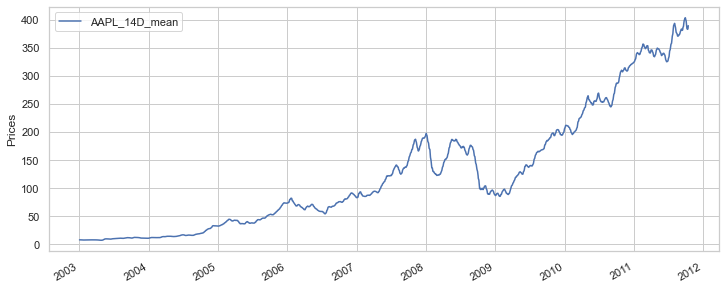

In [75]:
# Plot with one single line of pandas
apple_df.rolling(window='14D').mean().rename(columns={"AAPL": "AAPL_14D_mean"}).plot(figsize=(12,5))
plt.ylabel('Prices')

Text(0, 0.5, 'Prices')

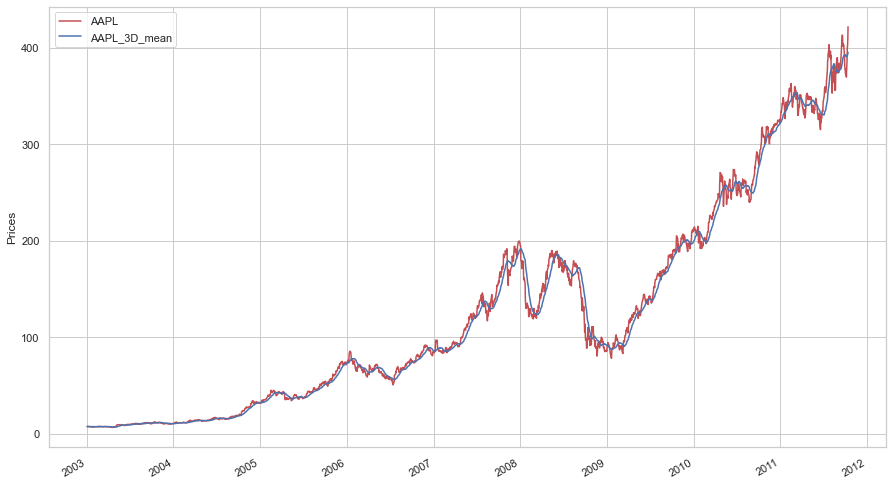

In [76]:
# Plotting all together (with the original data)
ax =apple_df.plot(c = 'r', figsize=(15,9))
apple_df.rolling('30D').mean().rename(columns={"AAPL": "AAPL_3D_mean"}).plot(ax=ax)
plt.ylabel('Prices')

Text(0, 0.5, 'Prices')

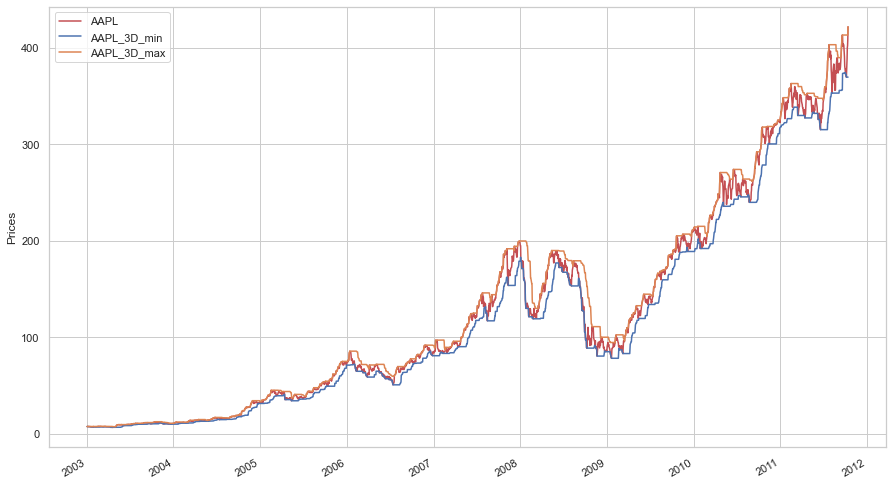

In [77]:
# Plotting all together (with the original data)
ax =apple_df.plot(c = 'r', figsize=(15,9))
apple_df.rolling('30D').min().rename(columns={"AAPL": "AAPL_3D_min"}).plot(ax=ax)
apple_df.rolling('30D').max().rename(columns={"AAPL": "AAPL_3D_max"}).plot(ax=ax)
plt.ylabel('Prices')

---
#### Bikeshare data

In [78]:
train = pd.read_csv('bike_train.csv')

In [80]:
train.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
437,2011-02-01 07:00:00,1,0,1,3,6.56,11.365,93,0.0000,0,52,52
7103,2012-04-14 08:00:00,2,0,0,1,14.76,17.425,71,8.9981,24,136,160
7242,2012-05-01 03:00:00,2,0,1,2,20.50,24.240,77,0.0000,1,2,3
2122,2011-05-15 08:00:00,2,0,0,2,22.14,25.760,94,8.9981,24,46,70
2079,2011-05-13 13:00:00,2,0,1,2,21.32,25.000,88,26.0027,69,157,226


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
